In [1]:
import numpy as np
import pandas as pd

In [2]:
# https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.isna().sum()

UDI                    0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Target                 0
Failure Type           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns[:2]

Index(['UDI', 'Product ID'], dtype='object')

In [7]:
# drop kolom UDI, Product ID
df.drop(df.columns[:2] , axis = 1, inplace = True)

In [8]:
# cek apakah ada kolom bertipe data object
cat_cols = df.select_dtypes(include = 'O').columns.tolist()
cat_cols

['Type', 'Failure Type']

In [9]:
# cek isi kolom bertipe data object
for col in cat_cols :
    print(df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [10]:
# cek apakah ada data dgn nilai Target = 1 (Failure)
df_f = df[df.Target == 1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

In [11]:
# cek Failure Type = 'No Failure' di dalam data dengan Target = 1
df_f[df_f['Failure Type'] == 'No Failure']

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
1437,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L,297.2,308.1,1431,49.7,210,1,No Failure


In [12]:
df_f[df_f['Failure Type'] == 'No Failure'].index

Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [13]:
idx = df_f[df_f['Failure Type'] == 'No Failure'].index

In [14]:
# hapus data anomali tsb
df.drop(idx , axis =0 , inplace = True )

In [15]:
# sisa data
df_f = df[df.Target == 0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [16]:
# drop Failure Type = Random Failures
idx = df_f[df_f['Failure Type'] == 'Random Failures'].index
df.drop(idx , axis =0 , inplace = True )

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9973 non-null   object 
 1   Air temperature      9973 non-null   float64
 2   Process temperature  9973 non-null   float64
 3   Rotational speed     9973 non-null   int64  
 4   Torque               9973 non-null   float64
 5   Tool wear            9973 non-null   int64  
 6   Target               9973 non-null   int64  
 7   Failure Type         9973 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 701.2+ KB


In [18]:
# list kolom-kolom yg berisi data numerik
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'Target']

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
for i , col in enumerate(num_cols,1):
    print(i , col)

1 Air temperature
2 Process temperature
3 Rotational speed
4 Torque
5 Tool wear
6 Target


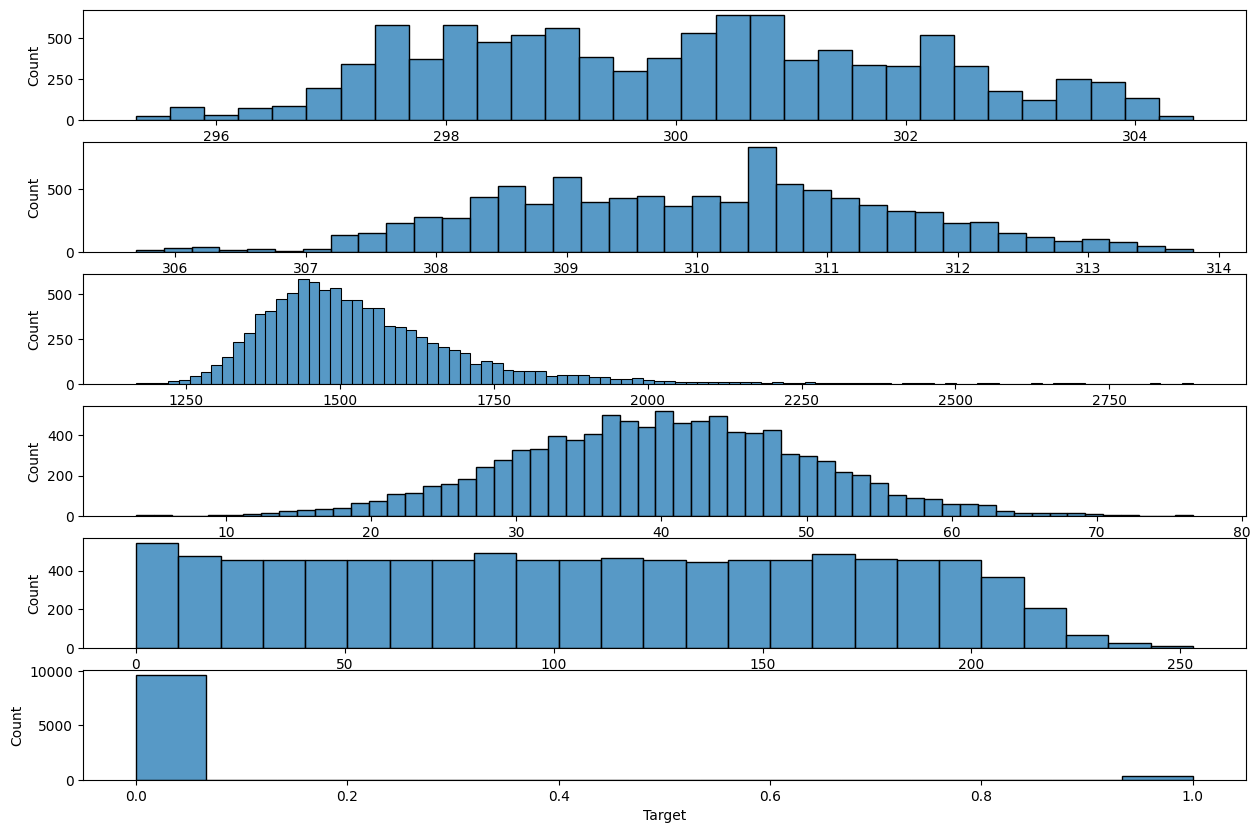

In [21]:
# visualisasi data
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(6,1,i)
    sns.histplot(data = df , x= col)

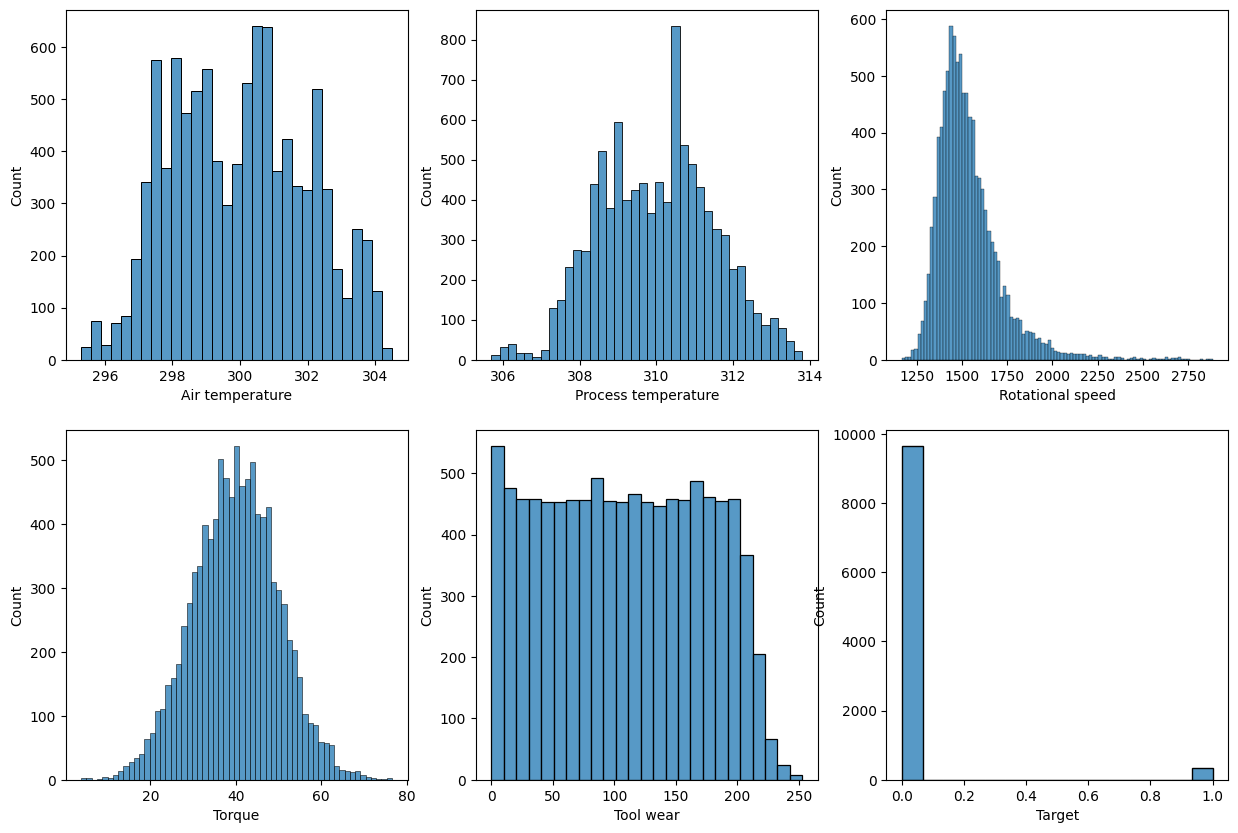

In [22]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data = df , x= col)

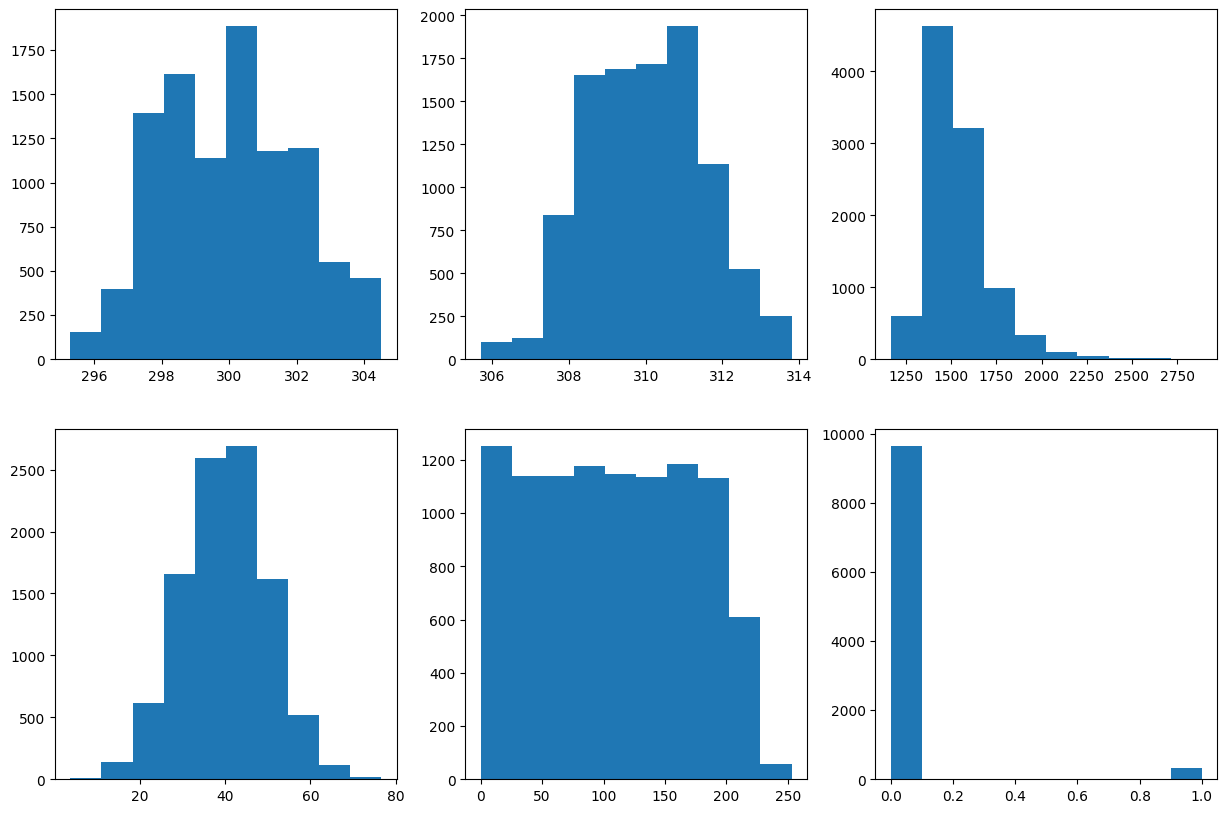

In [23]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    plt.hist(data = df , x= col)

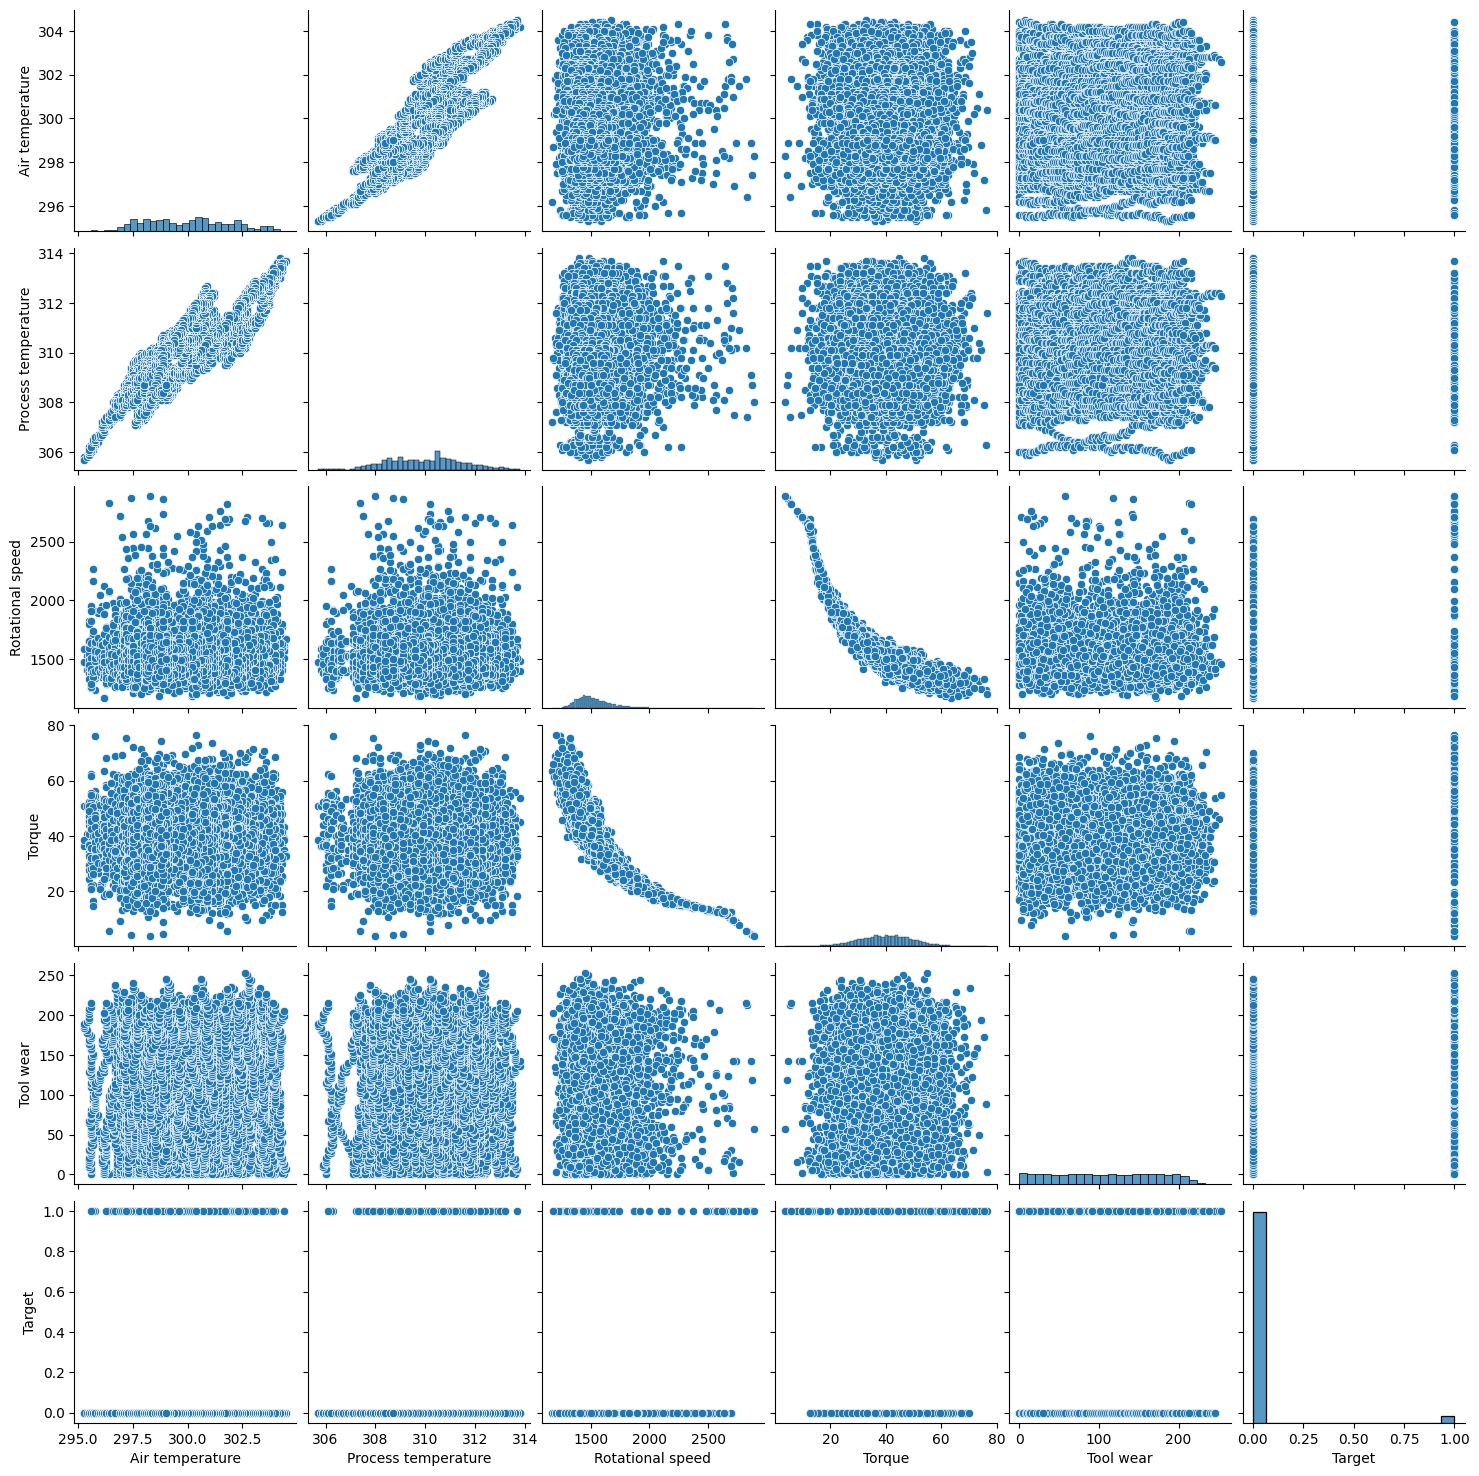

In [24]:
sns.pairplot(df)

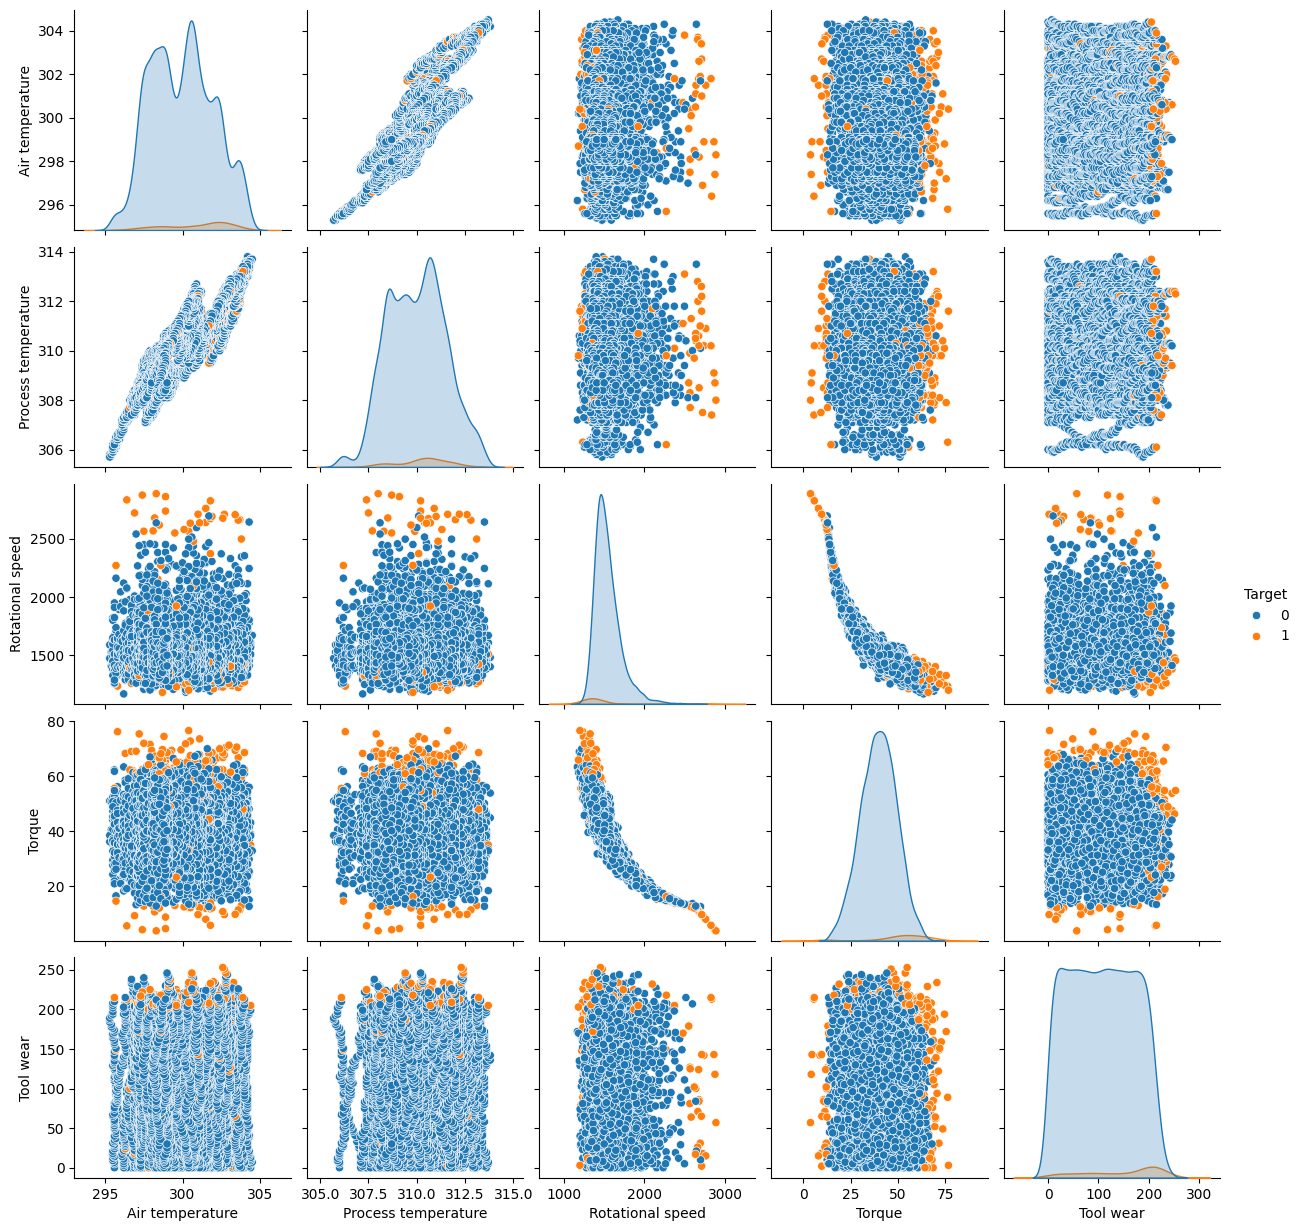

In [25]:
sns.pairplot(df , hue = 'Target')

In [26]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [27]:
df.columns[-2:]

Index(['Target', 'Failure Type'], dtype='object')

In [28]:
x = df.drop(df.columns[-2:] , axis = 1 )
y = df['Target']

In [29]:
x

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [30]:
# mapping data-data pada kolom Type menjadi integer
x['Type'] = x['Type'].replace(['M','L','H'], [1,2,3])
x

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1,298.1,308.6,1551,42.8,0
1,2,298.2,308.7,1408,46.3,3
2,2,298.1,308.5,1498,49.4,5
3,2,298.2,308.6,1433,39.5,7
4,2,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14
9996,3,298.9,308.4,1632,31.8,17
9997,1,299.0,308.6,1645,33.4,22
9998,3,299.0,308.7,1408,48.5,25


In [31]:
# gunakan train_test_split pada library scikit-learn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
X_train

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
9913,2,298.5,308.8,1589,30.6,11
2734,3,299.7,309.2,1572,32.8,142
7776,1,300.3,311.5,1445,47.3,40
3510,2,301.7,311.0,1474,42.6,164
8999,2,297.1,307.9,1492,39.4,171
...,...,...,...,...,...,...
5752,3,302.3,311.8,1804,25.0,43
5202,2,303.7,312.7,1335,51.1,161
5401,1,302.6,312.3,1454,54.8,253
860,3,296.1,306.9,1541,32.6,33


### Modelling: Logistic Regression, Support Vector Classifier

In [33]:
# modelling menggunakan Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
logreg.score(X_train, y_train)

0.9693159706630744

In [35]:
logreg.score(X_test, y_test)

0.9729647630619684

In [36]:
# cek, modelling menggunakan Support Vector Classifier (SVC) 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [37]:
svc.score(X_train, y_train)

0.9648256249064512

In [38]:
svc.score(X_test, y_test)

0.971142162818955

In [39]:
# cek, modelling menggunakan SVC dengan kernel RBF (Radial Basis Function)
from sklearn.svm import SVC
rsvc = SVC(kernel = 'rbf')
rsvc.fit(X_train, y_train)

SVC()

In [40]:
rsvc.score(X_train, y_train)

0.9648256249064512

In [41]:
rsvc.score(X_test, y_test)

0.971142162818955

In [42]:
# Prediksi menggunakan model yang telah dilatih sebelumnya
# trained_model = SVC()
trained_model = LogisticRegression()

trained_model.fit(X_train, y_train)

# Data fitur yang ingin diprediksi
new_data = pd.DataFrame({
    'Type': [3],
    'Air temperature': [300],
    'Process temperature': [300],
    'Rotational speed': [1500],
    'Torque': [40],
    'Tool wear': [20]
})

# Melakukan prediksi
predicted_target = trained_model.predict(new_data)

# Menampilkan hasil prediksi
print("Hasil Prediksi:", predicted_target)


Hasil Prediksi: [1]


In [43]:
# contoh lain
X = np.array([[2, 298, 308, 1551, 42, 0]])
hasilprediksi = trained_model.predict(X)
hasilprediksi

if hasilprediksi == 0:
    print("Tidak ada kerusakan mesin")
else:
    print("Terdapat kerusakan mesin")

Tidak ada kerusakan mesin


d:\STUDY\ML\Predictive Maintenance\1-kihome\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
# generate file model ML .sav untuk web
import pickle
filename = 'model_prediksi_kerusakan_logreg.sav'
pickle.dump(trained_model, open(filename, 'wb'))

### Percobaan Optimasi Modelling: Transformer
(hasil evaluasi lebih kecil, yaitu 82%)

In [45]:
# create list kolom bertipe data Object
cat_cols = X_train.select_dtypes(include = 'O').columns.tolist()
cat_cols

[]

In [46]:
# create list kolom bertipe data Selain Object (numerik)
num_cols = X_train.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [47]:
# buat dua transformer, yaitu OneHotEncoder dan StandardScaler, 
# dan kemudian menggabungkannya menggunakan ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# OneHotEncoder digunakan untuk mengubah variabel kategori (categorical variables)
# menjadi representasi biner (one-hot encoding)
enc = OneHotEncoder(handle_unknown='ignore')

# StandardScaler digunakan untuk melakukan penskalaan fitur numerik (numerical features)
# agar memiliki mean 0 dan deviasi standar 1
sc = StandardScaler()
ct = ColumnTransformer(
    [
        ('encoding' , enc , cat_cols ) ,
        ('scaling' , sc , num_cols)
    ]
)

In [48]:
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)

In [49]:
y.value_counts()

Target
0    9643
1     330
Name: count, dtype: int64

In [50]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train_ct, y_train)

In [51]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 235), (1, 235)]


In [52]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train_ct, y_train)

In [53]:
print(sorted(Counter(y_resampled).items()))

[(0, 6446), (1, 6446)]


In [54]:
logreg.fit(X_resampled , y_resampled)

LogisticRegression()

In [55]:
logreg.score(X_resampled , y_resampled)

0.8250853242320819

In [56]:
logreg.score(X_test_ct , y_test)

0.8262454434993924

In [57]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy =0.5)
und = RandomUnderSampler()
pipe = Pipeline(
    [
        ('o' , over) ,
        ('u' , und)
    ]
    )
x_s ,y_s = pipe.fit_resample(X_train_ct , y_train)

In [58]:
print(sorted(Counter(y_s).items()))

[(0, 3223), (1, 3223)]


In [59]:
logreg.fit(x_s, y_s)

LogisticRegression()

In [60]:
logreg.score(X_test_ct , y_test)

0.8210814094775213